# Browne Permanent Portfolio

In [1]:
!python --version
!pip install -r requirements.txt

Python 3.11.10
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 49.0 MB/s  0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 102.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 115.5 MB/s  0:00:00
  DEPRECATION: Building 'ta' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly c

In [2]:
import seaborn as sns  # Import seaborn since it's used in the heatmap plotting
from typing import Type
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import riskfolio.src.PlotFunctions as plf
import riskfolio as rp

# PORTFOLIO ALLOCATION: Define tickers and weights

tickers_ptf = {
    'IVV': [0.1833,(0.0, 0.7)],  # iShares Core S&P 500 ETF
    'IEV': [0.1808,(0.0, 0.7)],  # European Markets
    'GOVT': [0.1953,(0.0, 0.30)],  # iShares US Treasury Bond ETF All maturities / Duration: ~6.5 years / Broad 
    'TIP': [0.00,(0.0, 0.30)], #iShares Trust-TIPS Bond ETF USD DIS
    'GLD': [0.28,(0.0, 0.30)],  # SPDR Gold Trust USD DIS
    'IBIT': [0.16,(0.1, 0.30)] # Bitcoin
}

tickers_ptf_test = {
    'IVV': [0.05,(0.0, 1)],  # iShares Core S&P 500 ETF
    'IEV': [0.05,(0.0, 1)],  # European Markets
    'GOVT': [0.0,(0.0, 1)],  # iShares US Treasury Bond ETF All maturities / Duration: ~6.5 years / Broad 
    'TIP': [0.20,(0.0, 1)], #iShares Trust-TIPS Bond ETF USD DIS
    'GLD': [0.40,(0.0, 1)],  # SPDR Gold Trust USD DIS
    'IBIT': [0.10,(0.0, 1)], # Bitcoin
        #Soft Commodities
    'GSG': [0.0,(0.0, 1)], # S&P GSCI commodities
    'DBA': [0.20,(0.0, 1)],  # Diversified soft Commodities / Futures based tracks the DBIQ Diversified Agriculture Index   
    'VEGI': [0.0,(0.0, 1)], # Global agri-producers (seed, meat, crops) / Invests in equity shares of global agriculture

    #Other Commodities: Energy, MEtals, Agriculture
    'DBC': [0.0,(0.0, 1)] # Energy: Crude oil, gasoline, heating oil, natural gas / Metals: Gold, silver, aluminum / 
}

tickers_ptf_swissquote= {
    'IVV': [0.1833,(0.0, 0.7)],  # iShares Core S&P 500 ETF
    'IEV': [0.1808,(0.0, 0.7)],  # European Markets
    'GOVT': [0.1953,(0.0, 0.30)],  # iShares US Treasury Bond ETF All maturities / Duration: ~6.5 years / Broad 
    'TIP': [0.00,(0.0, 0.30)], #iShares Trust-TIPS Bond ETF USD DIS
    'GLD': [0.28,(0.0, 0.30)],  # SPDR Gold Trust USD DIS
    'IBIT': [0.16,(0.1, 0.30)] # Bitcoin
}

tickers_ptf_swissquote_CHF_hedge= {
    'IUSC.SW': [0.1833,(0.0, 0.7)],  # iShares S&P 500 CHF Hedged UCITS ETF (Acc) IUSC
    'IEUC.SW': [0.1808,(0.0, 0.7)],  # iShares Core MSCI Europe UCITS ETF CHF Hedged (Acc) IEUC
    'TRSC.SW': [0.1953,(0.0, 0.30)],  # Invesco US Treasury Bond UCITS ETF CHF Hdg Acc TRSC
    'TIP1S': [0.00,(0.0, 0.30)], #UBS Core BBG TIPS 1-10 UCITS ETF hCHF acc TIP1S
    'GLD': [0.28,(0.0, 0.30)],  # SPDR Gold Trust USD DIS
    'IBIT': [0.16,(0.1, 0.30)] # Bitcoin
}

tickers_ptf_3a = {
    'CH0413292308': [0.25,(0.0, 0.30)],  # UBS Vitainvest World 100 Sustainable U - Actively Managed
    'CH1110134157': [0.25,(0.0, 0.30)], # UBS Vitainvest Passive 100 Sustainable Q - Passively Managed
    'CH0293175037': [0.25,(0.0, 0.30)], # UBS Vitainvest Swiss 75 Sustainable U - Actively Managed
    'CH1110134140': [0.25,(0.0, 0.30)] # UBS Vitainvest Passive 75 Sustainable Q - Passively Managed
}

tickers_ptf3a2 = {
    'CH0500707168': [0.15,(0.0, 0.7)],  #UBS (CH) Equity Fund - Swiss High Dividend (CHF) QL-dist
    'LU2464499966': [0.20,(0.0, 0.7)],  #UBS (Lux) Equity SICAV - European Income Opportunity (EUR) (CHF hedged) Q-acc
    'IE00BD34DB16': [0.20,(0.0, 0.7)],  #UBS Core S&P 500 UCITS ETF hCHF acc
    'IE000N6LBS91': [0.05,(0.0, 0.7)],  #UBS Core MSCI World UCITS ETF hCHF acc
    'LU2054466995': [0.00,(0.0, 0.7)],  #UBS (Lux) Key Selection SICAV - Digital Transformation Themes (USD) (CHF hedged) Q-acc

    'GLD': [0.30,(0.0, 0.50)],  # Gold
    'SLV': [0.0,(0.0, 0.30)],  # Silver

    #Crypto/Bitcoin
    'IBIT': [0.10,(0.0, 0.20)]   # Bitcoin
}

tickers_ptf_cecilou = {
    'CH0500707168': [0.0,(0.0, 0.7)],  #UBS (CH) Equity Fund - Swiss High Dividend (CHF) QL-dist
    'LU2464499966': [0.0,(0.0, 0.7)],  #UBS (Lux) Equity SICAV - European Income Opportunity (EUR) (CHF hedged) Q-acc
    'LU2054466995': [0.0,(0.0, 0.7)],  #UBS (Lux) Key Selection SICAV - Digital Transformation Themes (USD) (CHF hedged) Q-acc
    'GLD': [0.30,(0.0, 0.50)],  # Gold
    'IBIT': [0.15,(0.0, 0.20)]   # Bitcoin
}

tickers_ptf_etf = {
    #Equity
    'ACWI': [0.0,(0.0, 0.7)],  # MSCI All Country World tracks index composed of LArge and Mid Cap in developed and emerging equity markets
    'IVV': [0.18,(0.0, 0.7)],  # iShares Core S&P 500 ETF
    'IEV': [0.18,(0.0, 0.7)],  # European Markets
    'CSSX5E.MI':[0.0,(0.0, 0.7)],  # EURO STOXX® 50 index tracks the 50 largest Eurozone companies
    'BKF':[0.0,(0.0, 0.7)],  # Brazil, India, China (Russia is excluded due to market accessibility; the fund tracks the MSCI BIC Index rather than MSCI BRIC)
    'EEM': [0.0,(0.0, 0.7)],  # Emerging Markets Large and Mid Cap
    'EWL': [0.0,(0.0, 0.7)],  # Swiss Markets
    'EWJ': [0.0,(0.0, 0.7)],  # Swiss Markets
    
    #Cash / Treasury / Bonds
    #'SGOV': [0.0,(0.0, 0.15)], # iShares 0-3 Month Treasury Bond ETF / Duration: ~0.1 years / Money market alternative'
    #'SHV': [0.0,(0.0, 0.15)],  # iShares 0-1 year Treasury Bond ETF / Duration: ~0.4 years / T-bills, low duration
    #'SHY': [0.0,(0.0, 0.15)],  # iShares 1-3 Year Treasury Bond ETF / Duration: ~1.9 years / Low volatility
    #'IEI': [0.0,(0.0, 0.15)],  # iShares 3-7 Year Treasury Bond ETF / Duration: ~5 years / Mid-term
    #'IEF': [0.0,(0.0, 0.15)],  # iShares 7-10 Year Treasury Bond ETF / Duration: ~8 years / Higher rate sensitivity
    #'TLH': [0.0,(0.0, 0.15)],  # iShares 10-20 Year Treasury Bond ETF / Duration: ~14 years / Intermediate-long
    'TLT': [0.,(0.0, 0.15)],  # iShares 20+ Year Treasury Bond ETF / Duration: ~17–20 years / High duration, sensitive to interest rates
    'GOVT': [0.20,(0.0, 0.30)],  # iShares US Treasury Bond ETF All maturities / Duration: ~6.5 years / Broad exposure to the US Treasury curve
    'EMB': [0.0,(0.0, 0.30)], # iShares J.P. Morgan USD Emerging Markets Bond ETF / Tracks J.P. Morgan EMBI Global Core Index of USD-denominated sovereign debt
    'BND': [0.0,(0.0, 0.30)], # Vanguard Total Bond Market ETF / Tracks the Bloomberg U.S. Aggregate Float-Adjusted Index
    'LQD': [0.0,(0.0, 0.30)], # iShares iBoxx Investment Grade Corporate Bond ETF / Tracks the Markit iBoxx USD Liquid Investment Grade Index

    #Gold
    #'IAU': [0.2,(0.0, 0.30)],  # iShares Gold Trust / Better Expense Ratio
    'GLD': [0.27,(0.0, 0.30)],  # SPDR Gold Trust USD DIS
    'SLV': [0.0,(0.0, 0.15)],  # Silver

    #Soft Commodities
    'GSG': [0.0,(0.0, 0.30)], # S&P GSCI commodities
    'DBA': [0.0,(0.0, 0.30)],  # Diversified soft Commodities / Futures based tracks the DBIQ Diversified Agriculture Index   
    'VEGI': [0.0,(0.0, 0.30)], # Global agri-producers (seed, meat, crops) / Invests in equity shares of global agriculture

    #Other Commodities: Energy, MEtals, Agriculture
    'DBC': [0.0,(0.0, 0.30)], # Energy: Crude oil, gasoline, heating oil, natural gas / Metals: Gold, silver, aluminum / Agriculture: Corn, soybeans, sugar, wheat 
    
    #Crypto/Bitcoin
    'IBIT': [0.17,(0.1, 0.30)],   # Bitcoin
    'GB00BLD4ZL17' : [0.17,(0.1, 0.30)],   # Bitcoin in CHF
    'ETHA': [0.,(0.0, 0.30)]   # Etherum
}


total_weight = sum(value[0] for value in tickers_ptf.values())

#Filter List: all tickers or weight != 0
all_list = False
if all_list:
    tickers = list(tickers_ptf.keys())
else:
    tickers = [ticker for ticker, weight in tickers_ptf.items() if weight[0] != 0]

print(tickers)
print(f"Portfolio is {total_weight:.2%} allocated.")

['IVV', 'IEV', 'GOVT', 'GLD', 'IBIT']
Portfolio is 99.94% allocated.


[*********************100%***********************]  5 of 5 completed
/tmp/ipykernel_259/1346627891.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices.fillna(method='ffill', inplace=True)


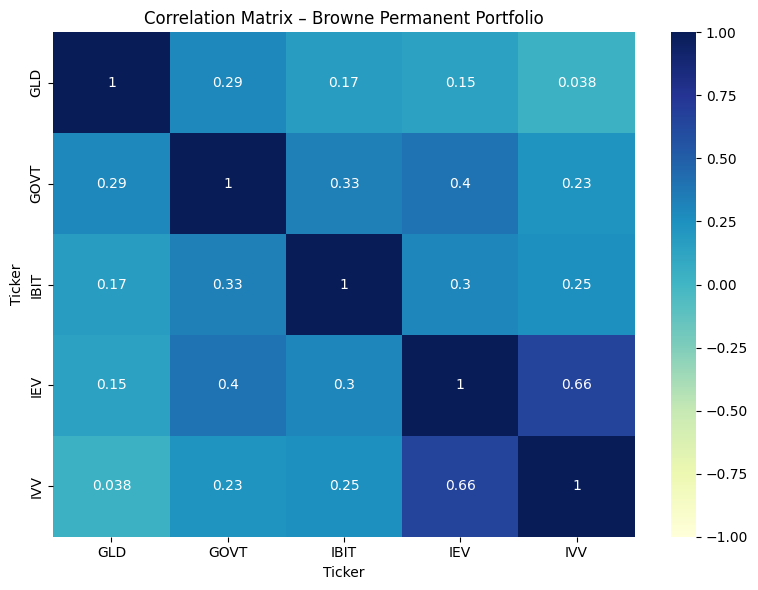

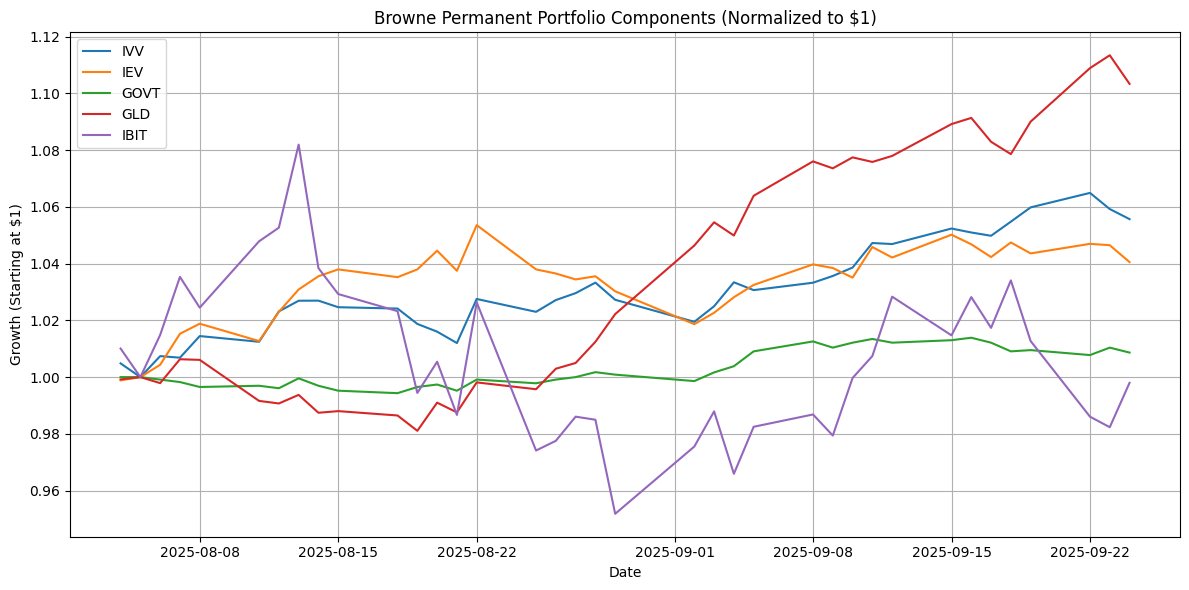

In [5]:
# Download historical data prices

#start_date = "2025-08-04"
start_date = "2025-08-04"
end_date = date.today().strftime("%Y-%m-%d")

prices = yf.download(tickers, start=start_date, end=end_date, interval="1d", auto_adjust=True)
#print(prices)

# Adjust the code to handle missing or changed column names
# Check if 'Adj Close' is available or use a fallback column
if 'Adj Close' in prices.columns.get_level_values(0):
    prices = prices['Adj Close']
elif 'Close' in prices.columns.get_level_values(0):  # Alternate case: 'Close'
    prices = prices['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' columns are available in the downloaded data.")

# Forward fill missing values
prices.fillna(method='ffill', inplace=True)

# Calculate correlation matrix
correlation = prices.pct_change().corr()  # Assuming percentage change is needed

# Calculating returns
price_change = prices.pct_change().dropna()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("Correlation Matrix – Browne Permanent Portfolio")
plt.tight_layout()
plt.show()


# Normalize portfolio components
normalized = prices / prices.iloc[1]

# Plot normalized portfolio components
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(normalized[ticker], label=ticker)

# Historical events
events = {
    "Fed rate hike shock begins": "1994-02-04",
    "Asian financial crisis starts": "1997-07-02",
    "Russian default": "1998-08-17",
    "Dot-com bubble peak": "2000-03-10",
    "9/11 terrorist attacks": "2001-09-11",
    "Iraq War begins": "2003-03-20",
    "GFC triggers (BNP Paribas freezes funds)": "2007-08-09",
    "Oil peaks near $147": "2008-07-11",
    "Lehman Brothers collapse": "2008-09-15",
    "Greece bailout deal (Euro crisis)": "2010-05-02",
    "Arab Spring begins (Egypt)": "2011-01-25",
    "Fed taper tantrum begins": "2013-05-22",
    "Russia annexes Crimea": "2014-03-18",
    "China stock market crash": "2015-06-12",
    "Brexit referendum result": "2016-06-24",
    "Volmageddon (VIX spike)": "2018-02-05",
    "Fed cuts rates to 0% + QE": "2020-03-15",
    "COVID market crash": "2020-03-16",
    "GameStop short squeeze": "2021-01-27",
    "Russia invades Ukraine": "2022-02-24",
    "Fed begins rate hikes": "2022-03-16",
    "SVB bank collapse": "2023-03-10",
    "Hamas attacks Israel": "2023-10-07",
    "Red Sea shipping crisis": "2024-01-12",
    "AI stocks surge (Nvidia peak)": "2024-05-15",
    "Tariffs announced by Trump": "2025-04-02"
}

# Convert event dates to datetime
event_dates = pd.to_datetime(list(events.values()))
event_labels = list(events.keys())

# Plot only if event date is in data index
for label, date in zip(event_labels, event_dates):
    if date in normalized.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)
        plt.text(date, normalized.max().max() * 0.95, label, rotation=90, verticalalignment='top', color='red')

#Plot
plt.title("Browne Permanent Portfolio Components (Normalized to $1)")
plt.xlabel("Date")
plt.ylabel("Growth (Starting at $1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

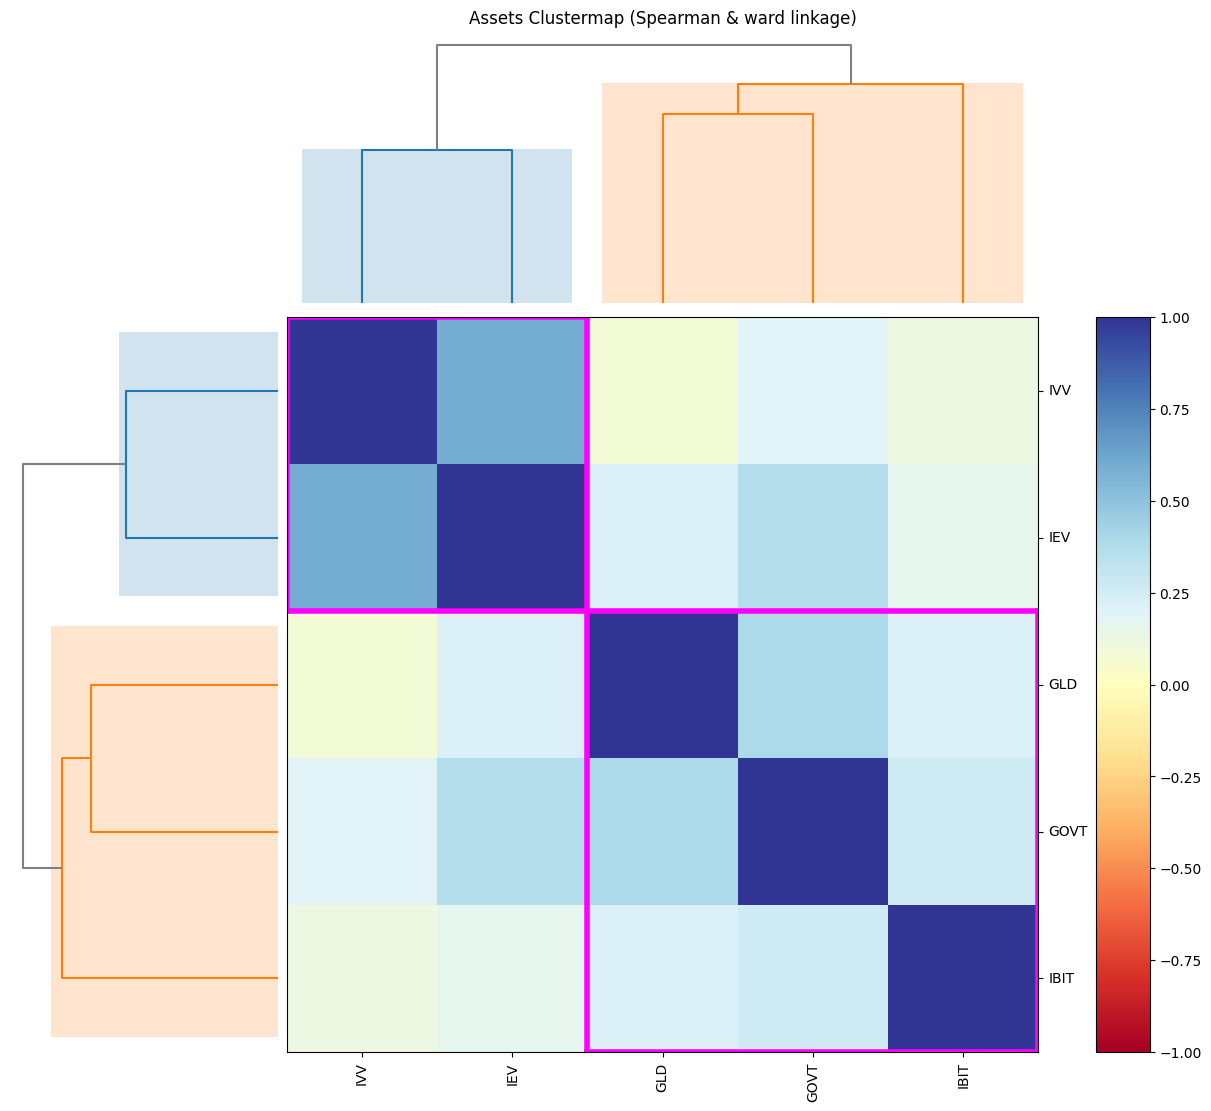

In [6]:

ax1 = rp.plot_clusters(returns=price_change,
                      codependence='spearman',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

IVV     0.1833
IEV     0.1808
GOVT    0.1953
GLD     0.2800
IBIT    0.1600
dtype: float64
📈 Cumulative Return: 4.79%
📈 CAGR: 38.72%
📉 Volatility: 8.74%
⚖️ Sharpe Ratio: 3.90 (Risk-free rate assumed 0)
 


/tmp/ipykernel_259/2138407371.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices_ffill.fillna(method='ffill', inplace=True)
/tmp/ipykernel_259/2138407371.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = portfolio_value[-1] / portfolio_value[0] - 1
/tmp/ipykernel_259/2138407371.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (portfolio_value[-1] / portfolio_value[0])**(1 / (len(portfolio_value) / 252)) - 1


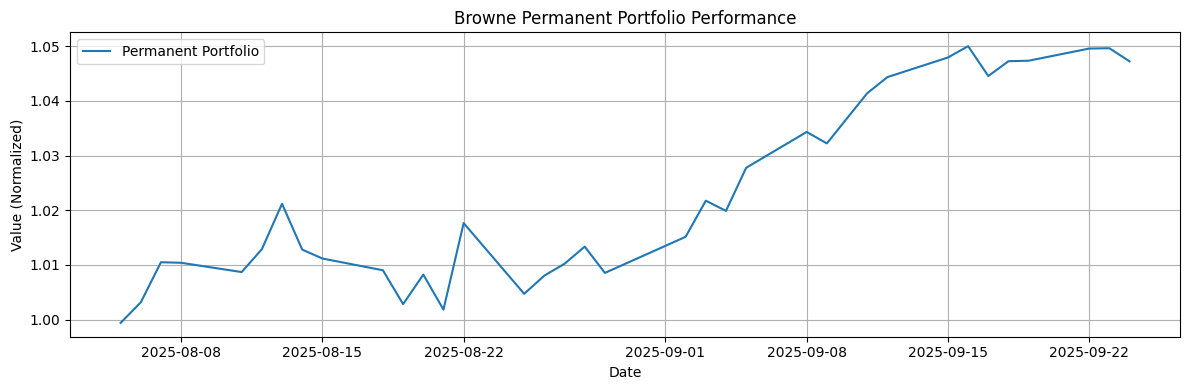

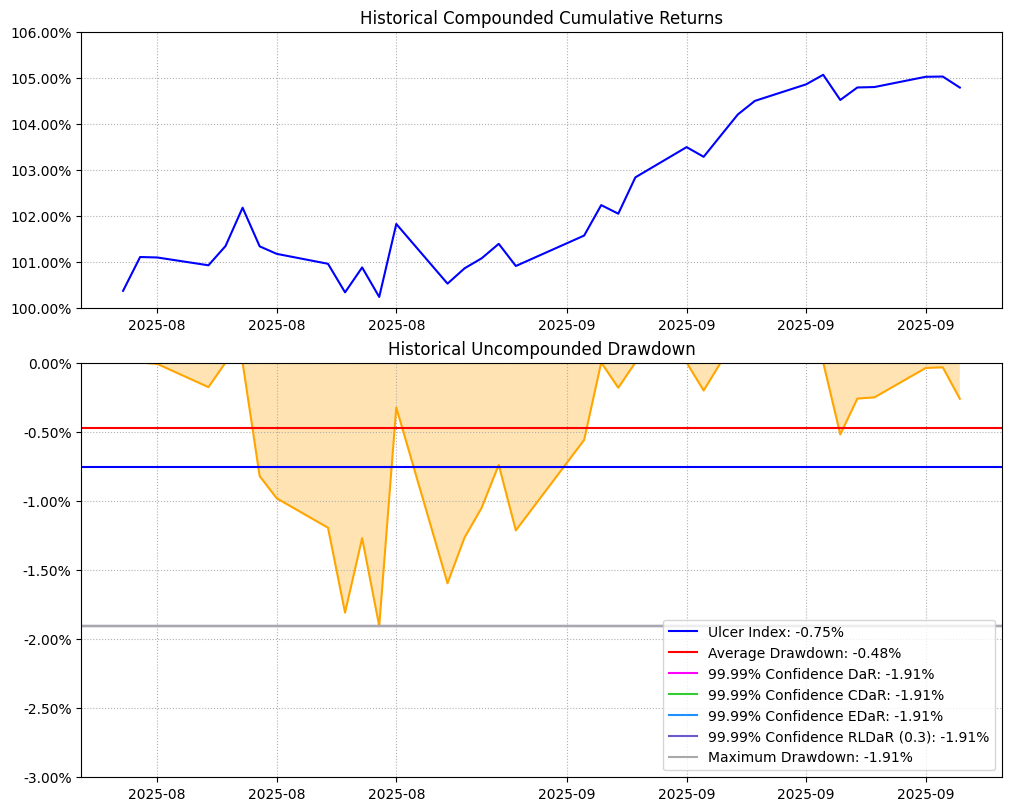

In [7]:
# Forward fill missing values
# Directly use the already processed 'prices' DataFrame instead of a non-existent 'Close' column
prices_ffill = prices.copy()
prices_ffill.fillna(method='ffill', inplace=True)

prices_ffill = prices_ffill.tail(-1) #Remove 1st record in case we have blank or NAN

# Calculate normalized returns (starting at $1)
normed = prices_ffill / prices_ffill.iloc[0]

# Calculate portfolio value
weights = pd.Series({ticker: weight[0] for ticker, weight in tickers_ptf.items() if weight[0] != 0})
print(weights)

# Ensure alignment between DataFrame and Series indices
portfolio_value = (normed * weights).sum(axis=1)

# Calculate performance
returns = portfolio_value.pct_change().dropna()
cumulative_return = portfolio_value[-1] / portfolio_value[0] - 1
cagr = (portfolio_value[-1] / portfolio_value[0])**(1 / (len(portfolio_value) / 252)) - 1
volatility = returns.std() * (252)**0.5
sharpe_ratio = (returns.mean() / returns.std()) * (252)**0.5

# Plot
plt.figure(figsize=(12, 4))

# Historical events
events = {
    "Fed rate hike shock begins": "1994-02-04",
    "Asian financial crisis starts": "1997-07-02",
    "Russian default": "1998-08-17",
    "Dot-com bubble peak": "2000-03-10",
    "9/11 terrorist attacks": "2001-09-11",
    "Iraq War begins": "2003-03-20",
    "GFC triggers (BNP Paribas freezes funds)": "2007-08-09",
    "Oil peaks near $147": "2008-07-11",
    "Lehman Brothers collapse": "2008-09-15",
    "Greece bailout deal (Euro crisis)": "2010-05-02",
    "Arab Spring begins (Egypt)": "2011-01-25",
    "Fed taper tantrum begins": "2013-05-22",
    "Russia annexes Crimea": "2014-03-18",
    "China stock market crash": "2015-06-12",
    "Brexit referendum result": "2016-06-24",
    "Volmageddon (VIX spike)": "2018-02-05",
    "Fed cuts rates to 0% + QE": "2020-03-15",
    "COVID market crash": "2020-03-16",
    "GameStop short squeeze": "2021-01-27",
    "Russia invades Ukraine": "2022-02-24",
    "Fed begins rate hikes": "2022-03-16",
    "SVB bank collapse": "2023-03-10",
    "Hamas attacks Israel": "2023-10-07",
    "Red Sea shipping crisis": "2024-01-12",
    "AI stocks surge (Nvidia peak)": "2024-05-15",
    "Tariffs announced by Trump": "2025-04-02"
}

# Convert event dates to datetime
event_dates = pd.to_datetime(list(events.values()))
event_labels = list(events.keys())

# Plot only if event date is in data index
for label, date in zip(event_labels, event_dates):
    if date in normalized.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)
        plt.text(date, normalized.max().max() * 0.95, label, rotation=90, verticalalignment='top', color='red')

plt.plot(portfolio_value, label='Permanent Portfolio')
plt.title('Browne Permanent Portfolio Performance')
plt.xlabel('Date')
plt.ylabel('Value (Normalized)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print performance metrics
print(f"📈 Cumulative Return: {cumulative_return:.2%}")
print(f"📈 CAGR: {cagr:.2%}")
print(f"📉 Volatility: {volatility:.2%}")
print(f"⚖️ Sharpe Ratio: {sharpe_ratio:.2f} (Risk-free rate assumed 0)")
print(" ")

df = pd.DataFrame(returns)
w = pd.Series(1, index=df.columns)

#Plot 
ax = rp.plot_drawdown(returns=df,
                      w=w,
                      alpha=0.0001,
                      height=8,
                      width=10,
                      ax=None)

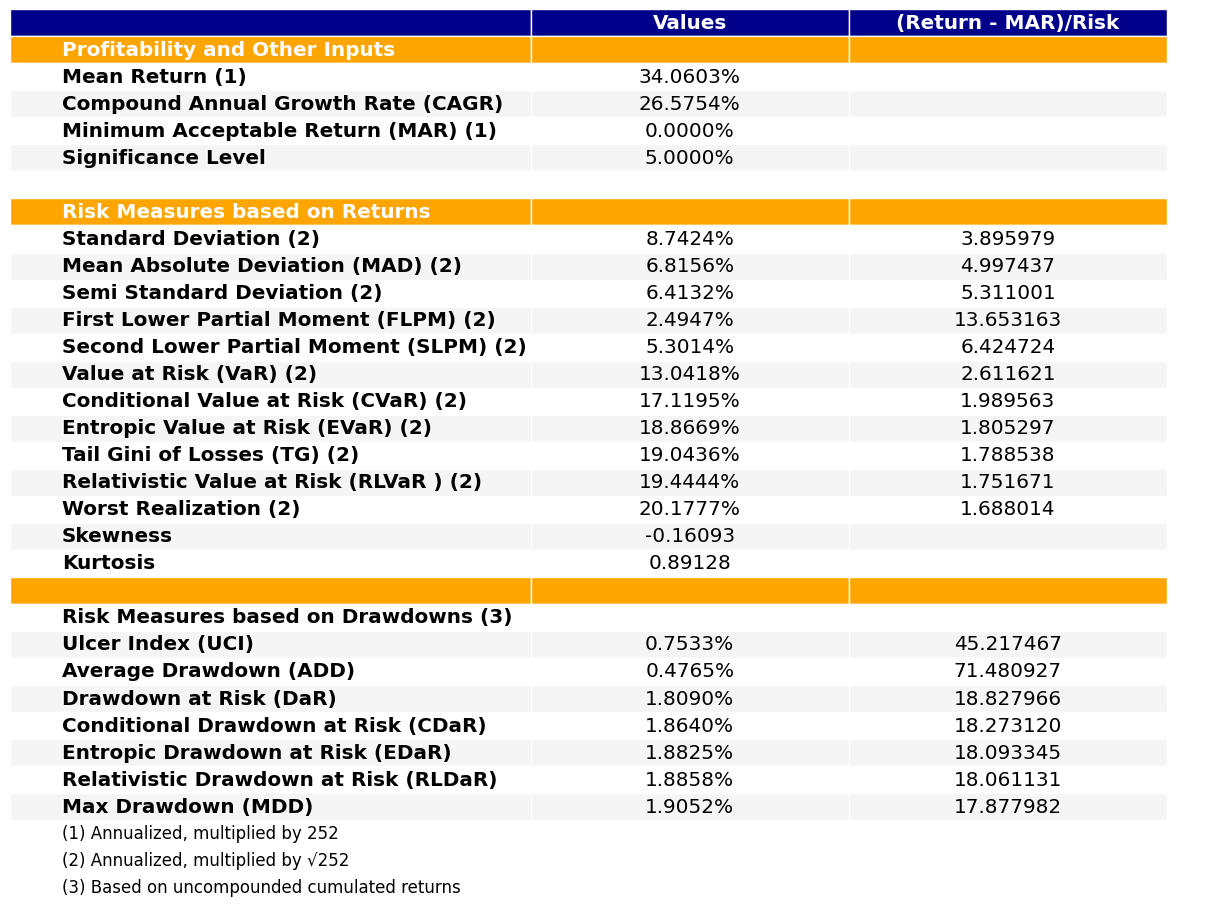

In [10]:
#Table with information about risk measures and risk adjusted return ratios.
ax1 = rp.plot_table(returns=df,
                   w=w,
                   MAR=0,
                   alpha=0.05,
                   ax=None)

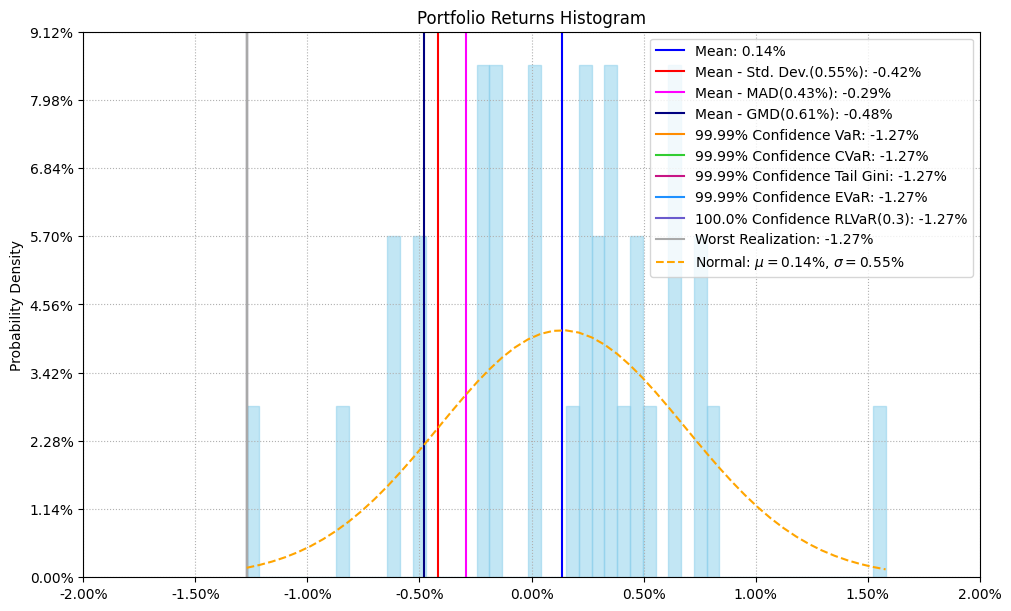

In [18]:
ax = rp.plot_hist(returns=df,
                  w=w,
                  alpha=0.0001,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)

In [20]:
#Compute .csv file
output_filename = f"historical_prices.xlsx"
output_filename2 = f"returns.xlsx"
prices.to_excel(output_filename, index=True) 
price_change.to_excel(output_filename2, index=True)  

print(f"Data has been successfully saved to '{output_filename}'.")
print(f"Data has been successfully saved to '{output_filename2}'.")

Data has been successfully saved to 'historical_prices.xlsx'.
Data has been successfully saved to 'returns.xlsx'.


# Compounding

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def compound_growth(
    currency: str,
    initial_investment: float,
    annual_rate: float,
    inflow: float = 0,
    years: float = 0,
    periods_per_year: int = 12
):
    """
    Compound growth with periodic inflows and summary output.

    Params:
        currency (string): Currency used
        initial_investment (float): Starting amount
        annual_rate (float): Annual interest rate (e.g., 0.07 for 7%)
        inflow (float): Contribution per period
        years (float): Investment duration in years
        periods_per_year (int): Compounding frequency (e.g., 12 = monthly)

    Returns:
        DataFrame of balance over time
        :rtype: DataFrame
    """
    # --- Initial Calculations ---
    total_periods = years * periods_per_year
    period_rate = annual_rate / periods_per_year
    starting_balance = initial_investment
    ending_balance = 0
    cumulated_interest=0
    results = []

    for period in range(total_periods):
        time = period / periods_per_year
        initial_investment2 =0
        ending_balance = round(starting_balance * (1 + period_rate),2)
        period_interest = round(ending_balance-starting_balance,2)
        cumulated_interest = cumulated_interest + period_interest
        results.append((time, inflow,starting_balance,period_interest,ending_balance,cumulated_interest))
        starting_balance = round(ending_balance+ inflow + initial_investment2,2)

    df = pd.DataFrame(results, columns=["Year","Inflow", "Starting_Balance","Interest", "Ending_Balance","P&L"])
    df["Inflow"].iloc[0]=0
    df.index = range(1, len(df) + 1) # df starts with index = 1 instead of 0

    # --- Summary Calculations ---
    final_balance = df["Ending_Balance"].iloc[-1]
    total_invested = initial_investment + inflow * (total_periods-1)
    total_interest = (final_balance - total_invested)

    # --- Print Summary ---
    print("📊 Compound Interest Summary")
    print(f"Initial Investment : {initial_investment:,.2f} {currency}")
    print(f"Periodic Inflow    : {inflow:,.2f} {currency} every {12 // periods_per_year} months")
    print(f"Annual Rate        : {annual_rate * 100:.2f}%")
    print(f"Total Years        : {years}")
    print(f"Total Invested     : {total_invested:,.2f} {currency}")
    print(f"Total Interest     : {total_interest:,.2f} {currency}")
    print(" ")
    print(f"Final Balance      : {final_balance:,.2f} {currency}")
    print(" ")

    # --- Plot ---
    plt.figure(figsize=(10, 5))
    plt.plot(df["Year"], df["Ending_Balance"], label="Investment Growth")
    plt.title("Compound Interest Growth Over Time")
    plt.xlabel("Years")
    plt.ylabel(f"Portfolio Value ({currency})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df

📊 Compound Interest Summary
Initial Investment : 10,000.00 CHF
Periodic Inflow    : 3,500.00 CHF every 1 months
Annual Rate        : 25.00%
Total Years        : 10
Total Invested     : 426,500.00 CHF
Total Interest     : 1,515,494.25 CHF
 
Final Balance      : 1,941,994.25 CHF
 
         Year  Inflow  Starting_Balance  Interest  Ending_Balance         P&L
108  8.916667    3500        1448546.18  30178.05      1478724.23  1094224.23
109  9.000000    3500        1482224.23  30879.67      1513103.90  1125103.90
110  9.083333    3500        1516603.90  31595.91      1548199.81  1156699.81
111  9.166667    3500        1551699.81  32327.08      1584026.89  1189026.89
112  9.250000    3500        1587526.89  33073.48      1620600.37  1222100.37
113  9.333333    3500        1624100.37  33835.42      1657935.79  1255935.79
114  9.416667    3500        1661435.79  34613.25      1696049.04  1290549.04
115  9.500000    3500        1699549.04  35407.27      1734956.31  1325956.31
116  9.583333    3

/tmp/ipykernel_327/2868182499.py:45: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Inflow"].iloc[0]=0
/tmp/ipykernel_327/2868182499.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

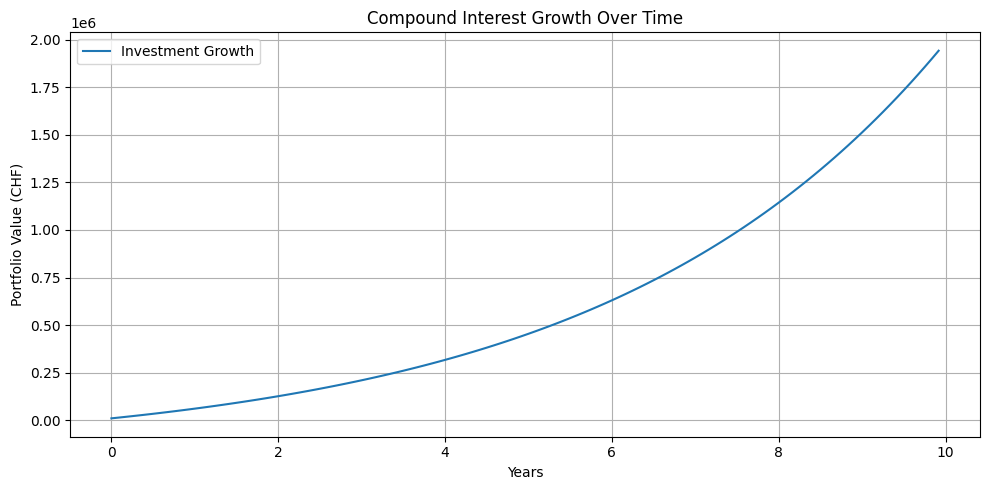

In [4]:
df = compound_growth(
    currency="CHF",
    initial_investment=10000,
    annual_rate=0.25,
    inflow=3500, # Per period
    years=10,
    periods_per_year= 12 # Ex: Daily = 360 / Monthly = 12
)

print(df.tail(13))